In [ ]:
import pandas as pd

In [ ]:
dt=pd.read_csv("/content/AppleSales.csv")

In [ ]:
dt.head()

,Date,Apple_products,Sales
0,2018-09-16,Airpods,45786.0
1,2018-09-16,Airpods,42555.0
2,2018-09-16,Airpods,60048.0
3,2018-09-16,Airpods,64323.0
4,2018-09-16,Airpods,49938.0


In [ ]:
dt['Apple_products'].unique()

array(['Airpods', 'MacBookAir', 'Applewatch'], dtype=object)

In [ ]:
df=dt.set_index("Date")

In [ ]:
airpods_data = df[df['Apple_products'] == 'Airpods']

In [ ]:
airpods_data.head()

,Apple_products,Sales
Date,,
2018-09-16,Airpods,45786.0
2018-09-16,Airpods,42555.0
2018-09-16,Airpods,60048.0
2018-09-16,Airpods,64323.0
2018-09-16,Airpods,49938.0


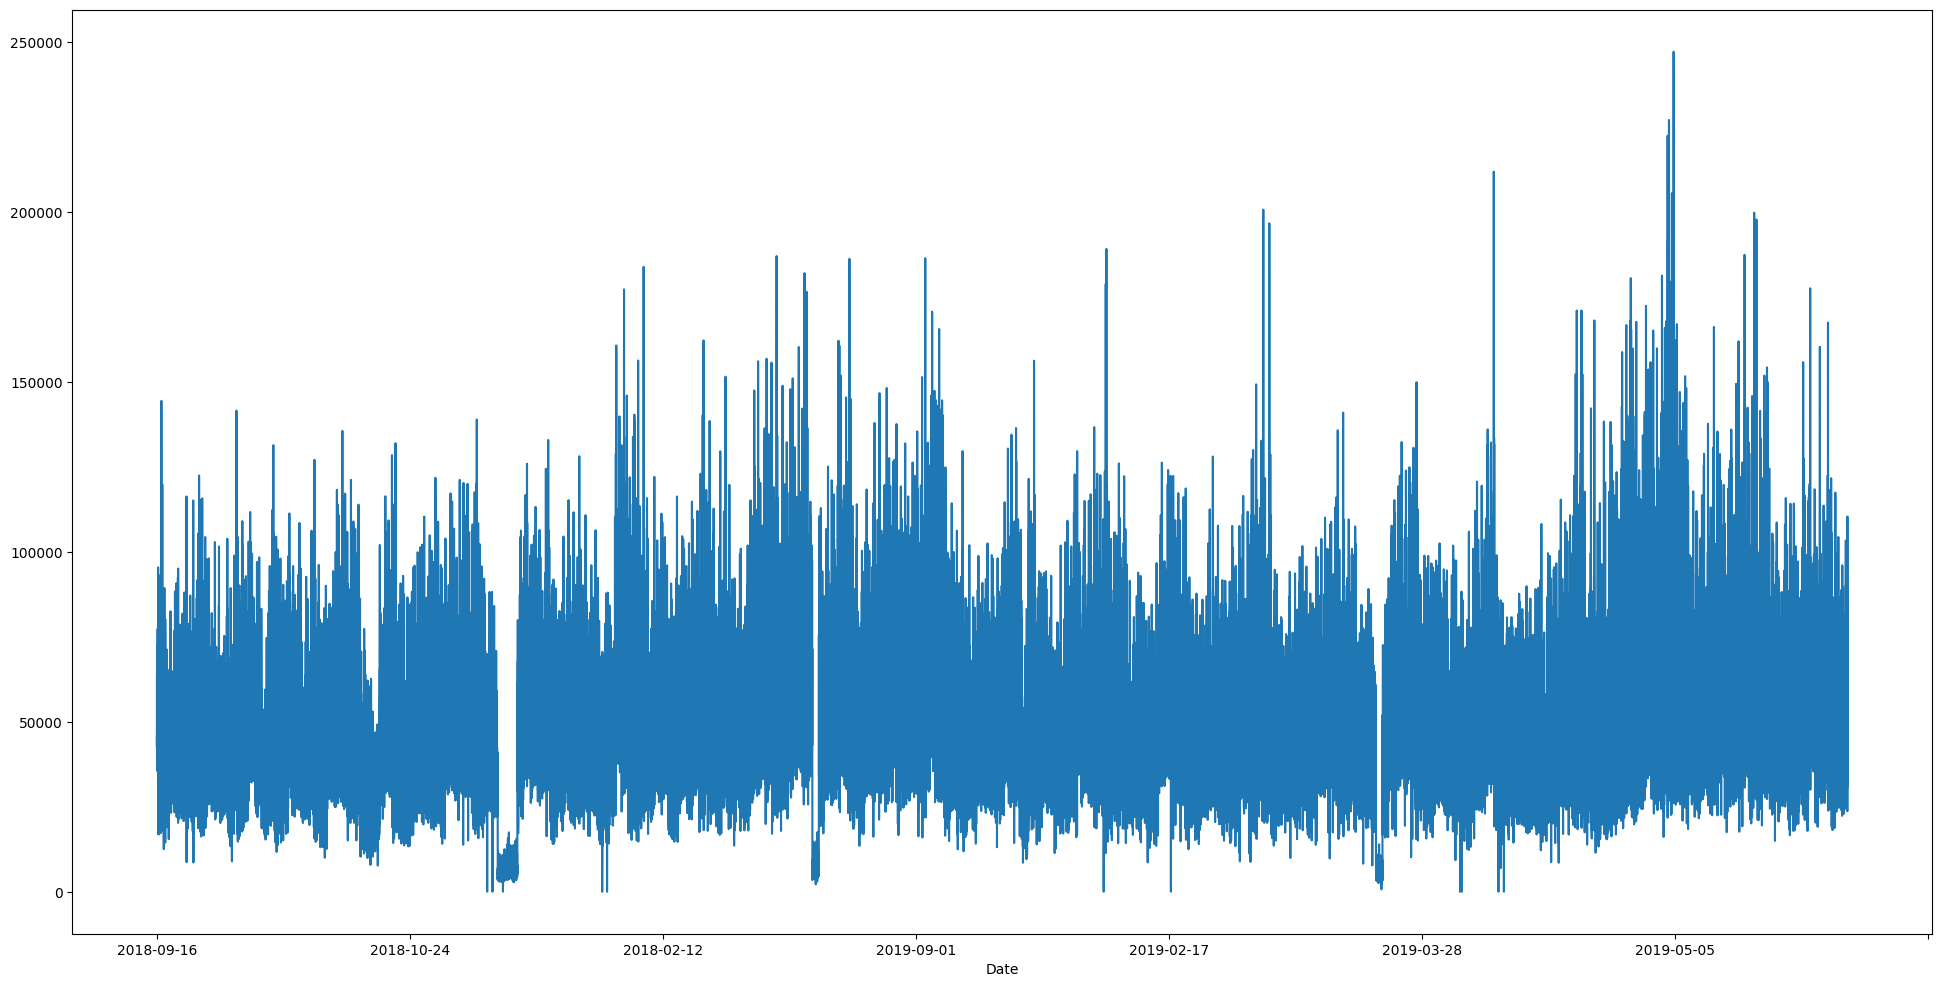

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,12))
airpods_data.Sales.plot()
plt.show()

In [ ]:
airpods_data['MA']=airpods_data['Sales'].rolling(window=4).mean()

<ipython-input-25-15976083b837>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airpods_data['MA']=airpods_data['Sales'].rolling(window=4).mean()


In [ ]:
airpods_data.head()

,Apple_products,Sales,MA
Date,,,
2018-09-16,Airpods,45786.0,NaN
2018-09-16,Airpods,42555.0,NaN
2018-09-16,Airpods,60048.0,NaN
2018-09-16,Airpods,64323.0,53178.0
2018-09-16,Airpods,49938.0,54216.0


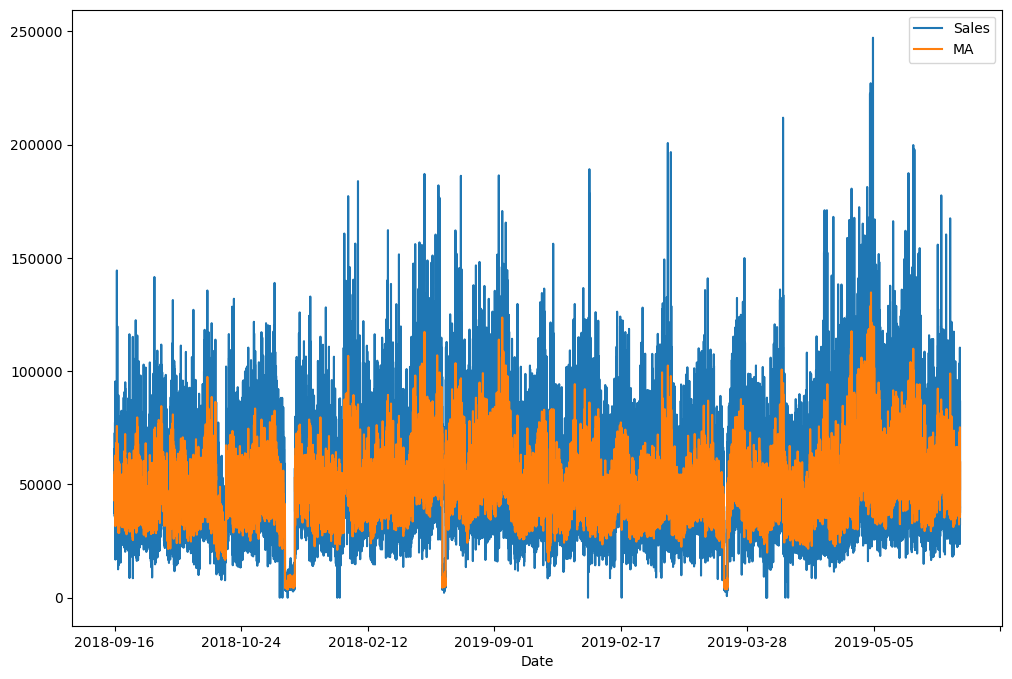

In [ ]:
import matplotlib.pyplot as plt
airpods_data[["Sales","MA"]].plot(figsize=(12,8))
plt.show()

In [ ]:
airpods_data['WMA']=airpods_data['Sales'].rolling(window=4).apply(lambda x: (x * [0.1, 0.2, 0.3, 0.4]).sum(), raw=True)
airpods_data['Naive_Forecast']=airpods_data['Sales'].shift(1)

<ipython-input-30-4b3ea260bf19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airpods_data['WMA']=airpods_data['Sales'].rolling(window=4).apply(lambda x: (x * [0.1, 0.2, 0.3, 0.4]).sum(), raw=True)
<ipython-input-30-4b3ea260bf19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airpods_data['Naive_Forecast']=airpods_data['Sales'].shift(1)


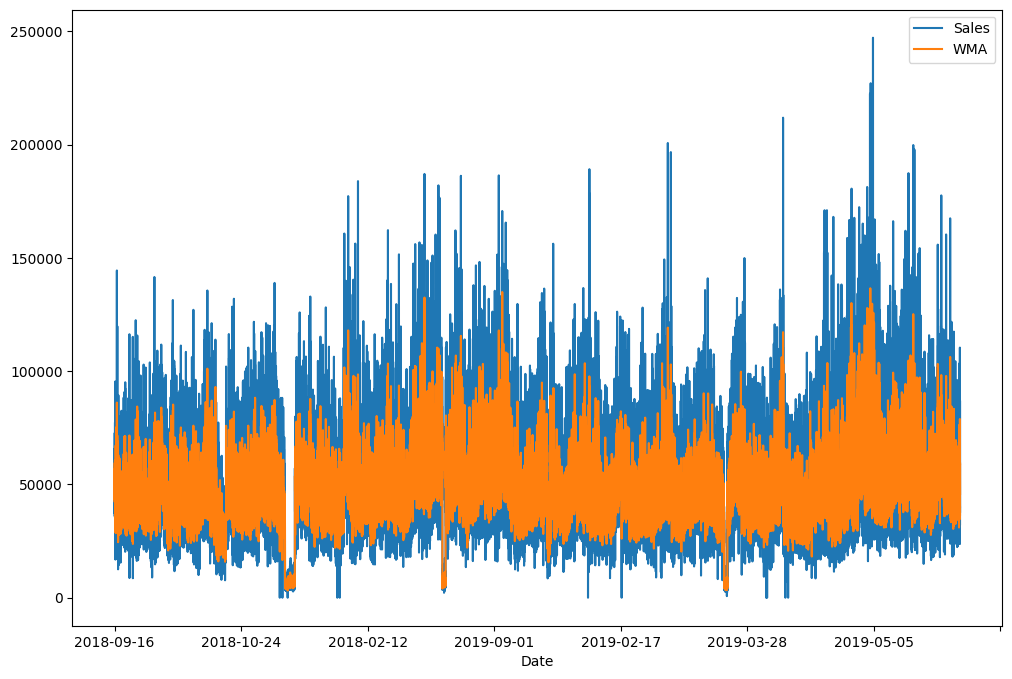

In [ ]:
import matplotlib.pyplot as plt
airpods_data[["Sales","WMA"]].plot(figsize=(12,8))
plt.show()

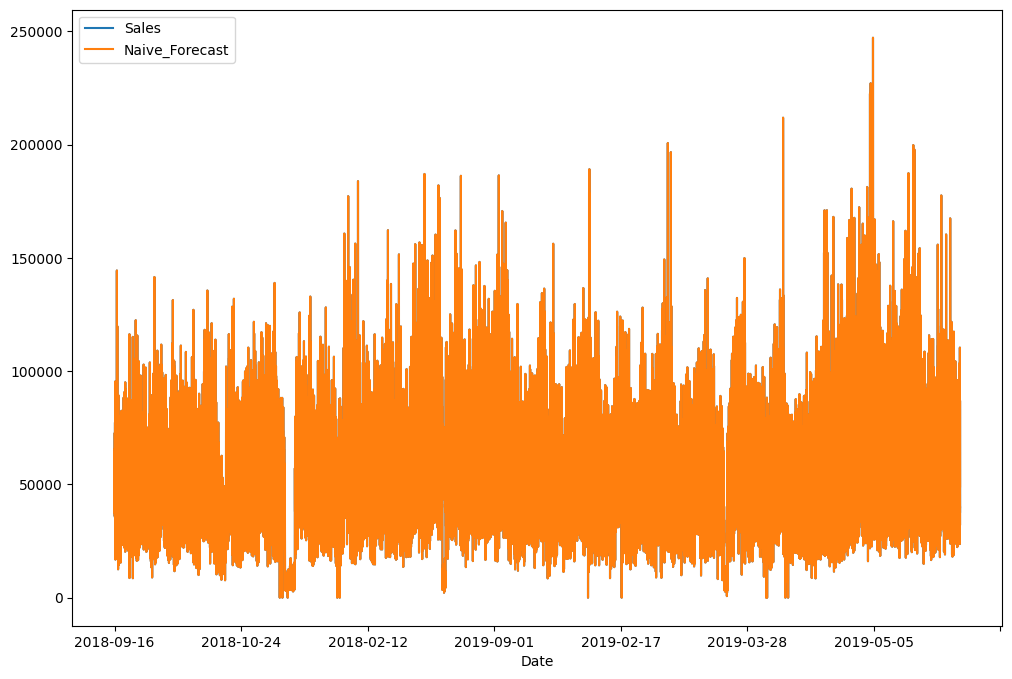

In [ ]:
import matplotlib.pyplot as plt
airpods_data[["Sales","Naive_Forecast"]].plot(figsize=(12,8))
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from itertools import product

In [ ]:
def evaluate_holt(alpha, beta):
    model = ExponentialSmoothing(airpods_data['Sales'], trend='add')
    fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)
    forecast = fit.predict(start=0, end=len(airpods_data)-1)  # Forecast entire training data
    mse = mean_squared_error(airpods_data['Sales'], forecast)
    return mse

In [ ]:
alpha_values = [0.1, 0.3, 0.5, 0.7, 0.9]
beta_values = [0.1, 0.3, 0.5, 0.7, 0.9]

In [ ]:
best_mse = float('inf')
best_alpha = None
best_beta = None

In [ ]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
for alpha, beta in product(alpha_values, beta_values):
    mse = evaluate_holt(alpha, beta)
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha
        best_beta = beta

print("Best alpha:", best_alpha)
print("Best beta:", best_beta)
print("Best MSE:", best_mse)

Best alpha: 0.1
Best beta: 0.1
Best MSE: 300845065.3526036


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
DoubleExpomodel_airpods_data = ExponentialSmoothing(airpods_data['Sales'], trend='add')

In [ ]:
ResultDoubleExpo_airpods_data = DoubleExpomodel_airpods_data.fit(smoothing_level=0.5, smoothing_slope=0.3)

In [ ]:
airpods_data['DoubleExpo'] = ResultDoubleExpo_airpods_data.predict(start=0, end=len(airpods_data)-1)

In [ ]:
airpods_data.tail()

,Apple_products,Sales,MA,WMA,Naive_Forecast,DoubleExpo
Date,,,,,,
2019-05-31,Airpods,86994.18,51841.5150,59644.236,48026.88,23561.229101
2019-05-31,Airpods,50018.34,54269.8500,58914.966,86994.18,36875.002646
2019-05-31,Airpods,54572.64,59903.0100,59036.082,50018.34,41970.920711
2019-05-31,Airpods,49162.41,60186.8925,54739.842,54572.64,48722.755864
2019-05-31,Airpods,37977.00,47932.5975,45855.885,49162.41,53103.729565


In [ ]:
def evaluate_forecast(actual_values, forecast_values):

    RSFE = np.sum(actual_values - forecast_values)
    MAE = mean_absolute_error(actual_values, forecast_values)
    MSE = mean_squared_error(actual_values, forecast_values)
    RMSE = np.sqrt(MSE)
    mask = actual_values != 0
    MAPE = np.mean(np.abs((actual_values[mask] - forecast_values[mask]) / actual_values[mask])) * 100
    MPE = np.mean((actual_values[mask] - forecast_values[mask]) / actual_values[mask]) * 100

    evaluation_metrics = {
        'RSFE': RSFE,
        'MAE': MAE,
        'MSE': MSE,
        'RMSE': RMSE,
        'MAPE': MAPE,
        'MPE': MPE
    }

    return evaluation_metrics

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
alpha = 0.5  # You can adjust this value
beta = 0.3   # You can adjust this value

# Initialize the forecast column
airpods_data['expo_forecast'] = 0.0

# Apply exponential smoothing manually
airpods_data['expo_forecast'][0] = airpods_data['Sales'][0]  # Initialization

for i in range(1, len(airpods_data)):
    airpods_data['expo_forecast'][i] = alpha * airpods_data['Sales'][i] + \
                                        (1 - alpha) * (airpods_data['expo_forecast'][i - 1] +
                                                       beta * (airpods_data['Sales'][i] - airpods_data['expo_forecast'][i - 1]))

In [ ]:
DoubleExpo_AP_evaluation =evaluate_forecast(airpods_data['Sales'],airpods_data['expo_forecast'])
print(DoubleExpo_AP_evaluation)

{'RSFE': -1669.357133914733, 'MAE': 5104.919429680579, 'MSE': 49030205.16348954, 'RMSE': 7002.157179290503, 'MAPE': 11.519175067877445, 'MPE': -3.735256856718589}


In [ ]:
airpods_data=airpods_data.fillna(value=0)

In [ ]:
WMA_AP_evaluation =evaluate_forecast(airpods_data['Sales'],airpods_data['WMA'])
print(WMA_AP_evaluation)

{'RSFE': 138007.28699991666, 'MAE': 8502.63905858849, 'MSE': 135050309.86928612, 'RMSE': 11621.114829020757, 'MAPE': 19.23996307880129, 'MPE': -6.397139492606925}


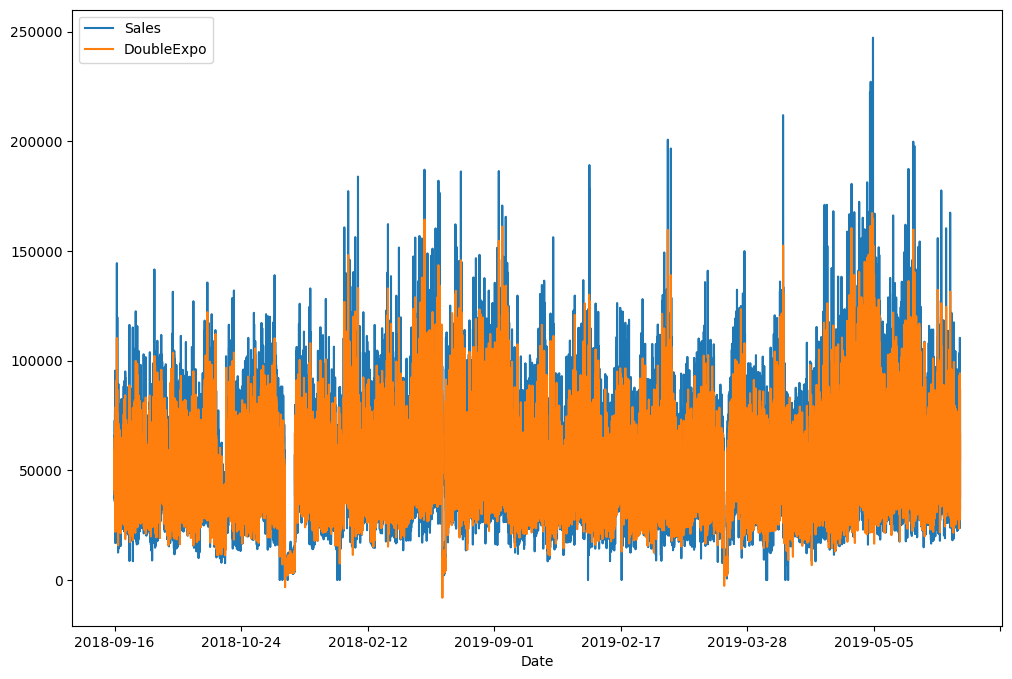

In [ ]:
import matplotlib.pyplot as plt
airpods_data[["Sales","DoubleExpo"]].plot(figsize=(12,8))
plt.show()

In [ ]:
def evaluate_model(alpha, beta, data):
    model = ExponentialSmoothing(data, trend='add', damped=True, initialization_method="estimated")
    fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta)
    forecast = fitted_model.fittedvalues
    return mean_squared_error(data, forecast)

In [ ]:
import numpy as np

In [ ]:
alpha_values = np.arange(0.0, 1.1, 0.1)
beta_values = np.arange(0.0, 1.1, 0.1)

# Create a list of all possible combinations of alpha and beta values
parameter_grid = list(product(alpha_values, beta_values))

In [ ]:
best_error = float('inf')
best_params = None
for alpha, beta in parameter_grid:
    error = evaluate_model(alpha, beta, airpods_data['Sales'])
    if error < best_error:
        best_error = error
        best_params = (alpha, beta)

print("Best parameters (alpha, beta):", best_params)
print("Best MSE:", best_error)

Best parameters (alpha, beta): (0.1, 0.0)
Best MSE: 285928298.62977576
